In [1]:
from functions import data_functions as data
from BB_data.data_processing.hads import main as hads
from BB_data.data_processing.oci_wsas import main as oci_wsas
from BB_data.data_processing.height_weight import main as bmi
from BB_data.data_processing.edeq import main as edeq
from BB_data.data_processing.aq10 import main as aq10
from BB_data.data_processing.time import main as time
from BB_data.data_processing.t1_data import main as t1
from functions import behavioural_functions as bf

import pandas as pd
import seaborn as sns
import statsmodels.stats.api as stats
import matplotlib.pyplot as plt
sns.set_style('dark')

In [2]:
dropindex = [72, 136, 138, 139, 141, 143, 144, 152, 156, 158, 159, 160, 167, 176, 178, 181, 182]
df = data.data('questionnaire_data.csv','t2', clean=True, drop_index=dropindex)

In [3]:
hc = df[df['7.'].str.contains('B1')]
aan = df[df['7.'].str.contains('B2')]

In [4]:
print('Number of participants:', df.shape[0])
print('Number of AAN participants is', aan.shape[0])
print('Number of HC participants is', hc.shape[0])

Number of participants: 132
Number of AAN participants is 93
Number of HC participants is 39


In [5]:
hads_df = hads()
oci_df = oci_wsas('oci')
wsas_df = oci_wsas('wsas')
bmi_df = bmi()
edeq_df = edeq()
aq_df = aq10()
time_df = time()

In [6]:
edeq_t1 = t1('edeq') 
hads_t1 = t1('hads')
bmi_t1 = t1('bmi')
oci_t1 = t1('oci')
aq10_t1 = t1('aq10')
wsas_t1 = t1('wsas')

<AxesSubplot:>

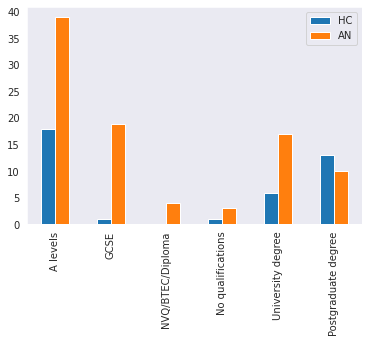

In [7]:
education = pd.get_dummies(df['17.'])
education = pd.concat([df['7.'], education], axis=1)
hc_education = education[education['7.'].str.contains('B1')]
an_education = education[education['7.'].str.contains('B2')]
hc_education['group'] = 'HC'
an_education['group'] = 'AN'

eduction_hc = hc_education.sum()
eduction_an = an_education.sum()
education_hc =  pd.concat([eduction_hc[['A levels', 'GCSE', 'NVQ/BTEC/Diploma', 'No qualifications', 'University degree', 
                                    'Postgraduate degree']]])
education_aan =  pd.concat([eduction_an[['A levels', 'GCSE', 'NVQ/BTEC/Diploma', 'No qualifications', 'University degree', 
                                    'Postgraduate degree']]])
education_plot = pd.concat([education_hc, education_aan], axis=1).rename(columns={0:'HC',1:'AN'})

education_plot.plot.bar()

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'Time (Years)')]

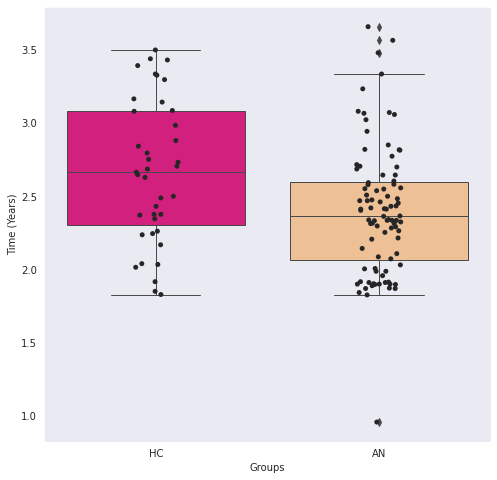

In [8]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
sns.boxplot(x='group', y='years', data=time_df, linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="years", data=time_df, color=".15")
ax.set(xlabel='Groups', ylabel='Time (Years)')

In [16]:
hc = time_df[time_df['group'].str.contains('HC')]
an = time_df[time_df['group'].str.contains('AN')]
t_test = stats.ttest_ind(hc['years'].dropna(), an['years'].dropna())
print('Difference in Time between groups:','\np-val:', t_test[1], '\nt_value:', t_test[0], '\ndf:', t_test[2])
print(bf.cohen_d(an['years'].dropna(), hc['years'].dropna()))

Difference in Time between groups: 
p-val: 0.0025441001801685442 
t_value: 3.0782502234357274 
df: 129.0


NameError: name 'math' is not defined

Text(0.5, 1.0, 'Depression at time point 1')

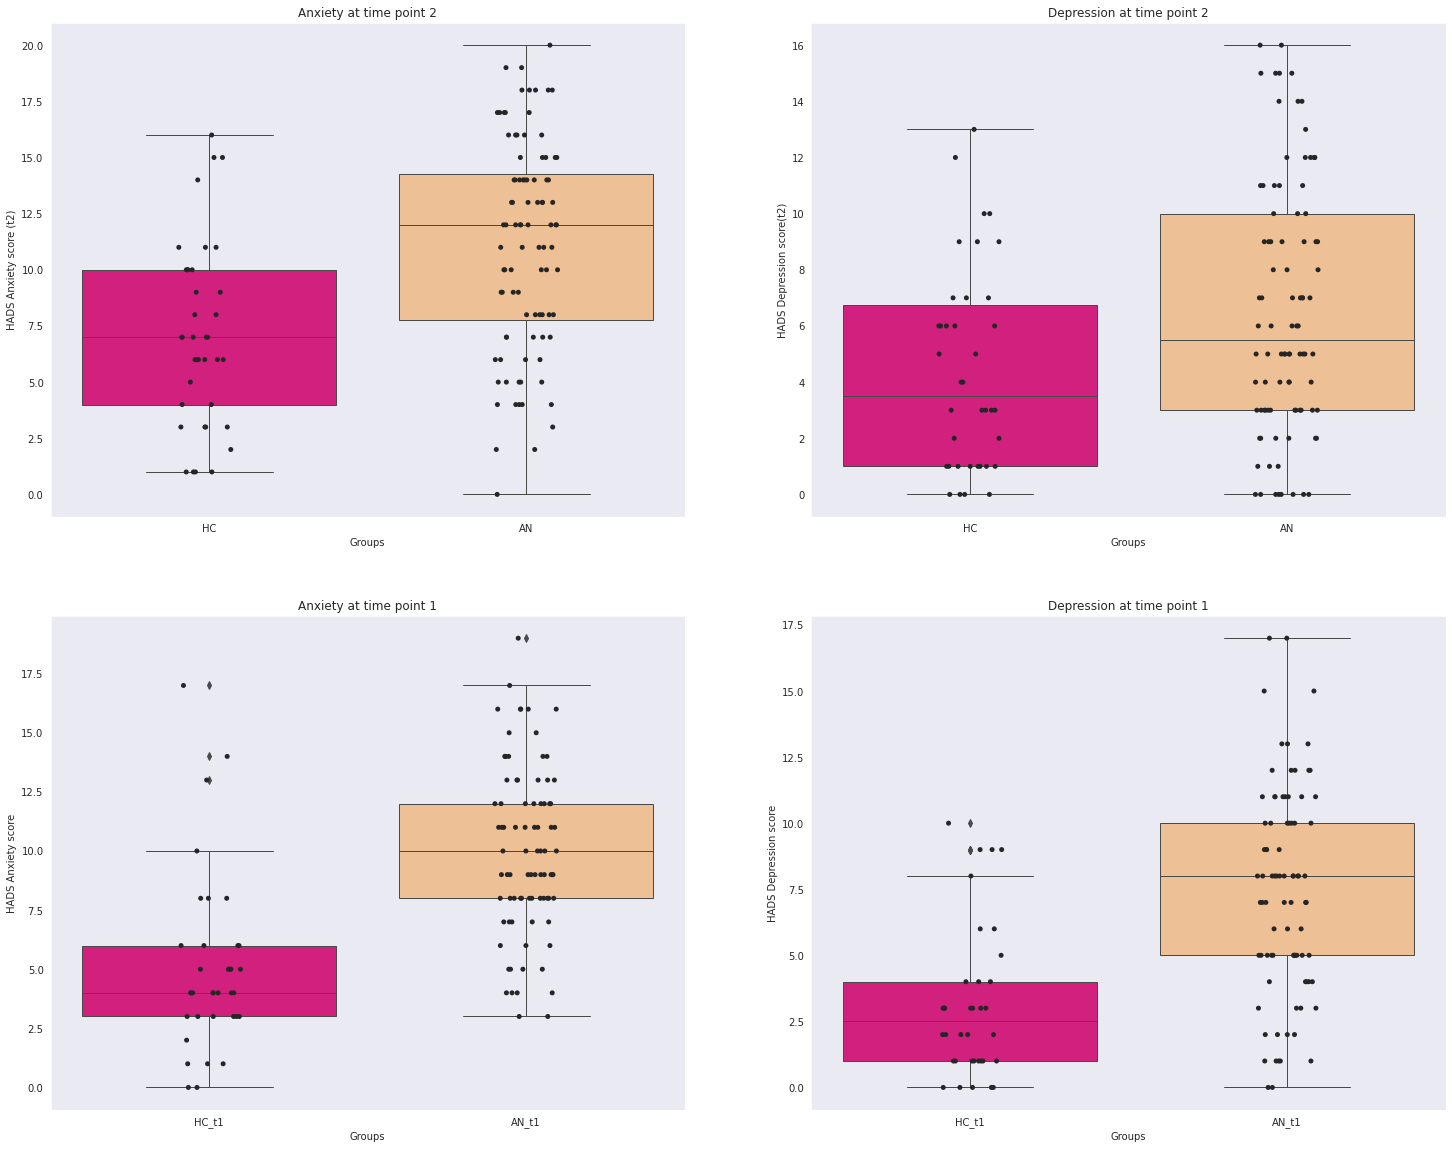

In [10]:
fig,ax = plt.subplots(2,2, figsize=(25,20))
sns.boxplot(x='group', y='anxiety', data=hads_df, ax=ax[0][0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][0], x="group", y="anxiety", data=hads_df, color=".15")
ax[0][0].set(xlabel='Groups', ylabel='HADS Anxiety score (t2)')
ax[0][0].set_title('Anxiety at time point 2')

sns.boxplot(x='group', y='depression', data=hads_df, ax=ax[0][1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][1], x="group", y="depression", data=hads_df, color=".15")
ax[0][1].set(xlabel='Groups', ylabel='HADS Depression score(t2)')
ax[0][1].set_title('Depression at time point 2')

sns.boxplot(x='group', y='anxiety', data=hads_t1, ax=ax[1][0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][0], x="group", y="anxiety", data=hads_t1, color=".15")
ax[1][0].set(xlabel='Groups', ylabel='HADS Anxiety score')
ax[1][0].set_title('Anxiety at time point 1')

sns.boxplot(x='group', y='depression', data=hads_t1, ax=ax[1][1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][1], x="group", y="depression", data=hads_t1, color=".15")
ax[1][1].set(xlabel='Groups', ylabel='HADS Depression score',)
ax[1][1].set_title('Depression at time point 1')


Text(0.5, 1.0, 'BMI at time point 1')

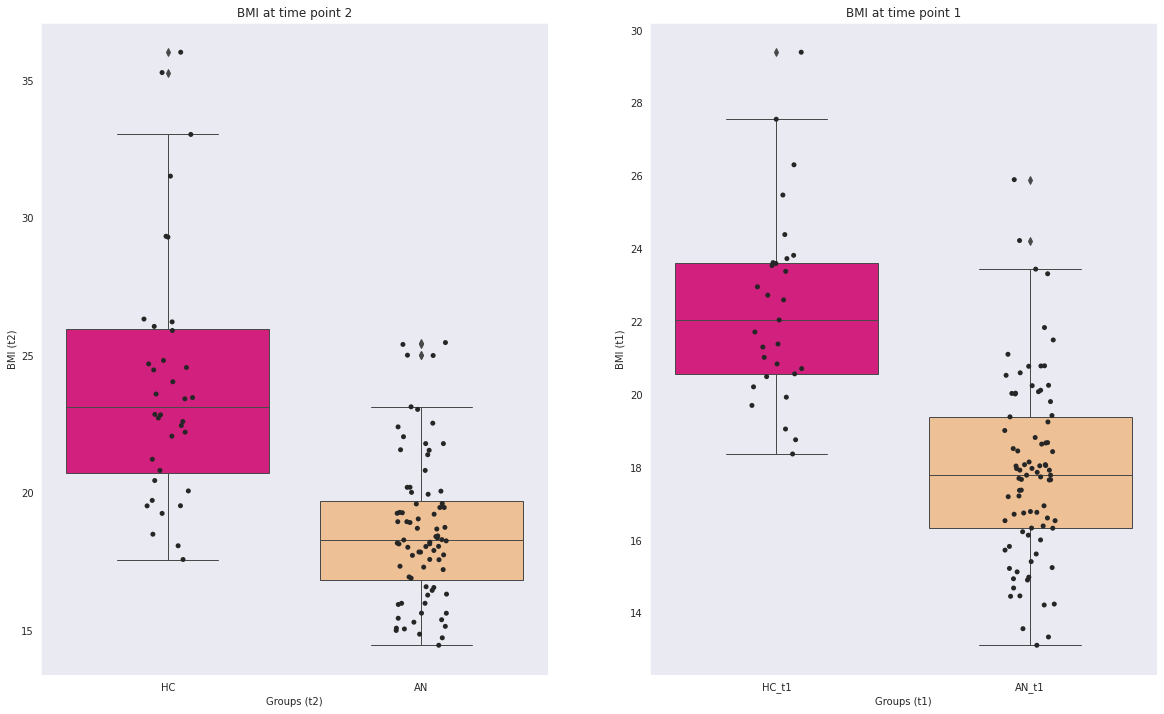

In [11]:
fig,ax = plt.subplots(1,2, figsize=(20,12))
sns.boxplot(x='group', y='bmi', data=bmi_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="bmi", data=bmi_df, ax=ax[0], color=".15")
ax[0].set(xlabel='Groups (t2)', ylabel='BMI (t2)')
ax[0].set_title('BMI at time point 2')

sns.boxplot(x='group', y='BMI_baseline', data=bmi_t1, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="BMI_baseline", data=bmi_t1, ax=ax[1], color=".15")
ax[1].set(xlabel='Groups (t1)', ylabel='BMI (t1)')
ax[1].set_title('BMI at time point 1')

Text(0.5, 1.0, 'OCD symptoms at time point 1')

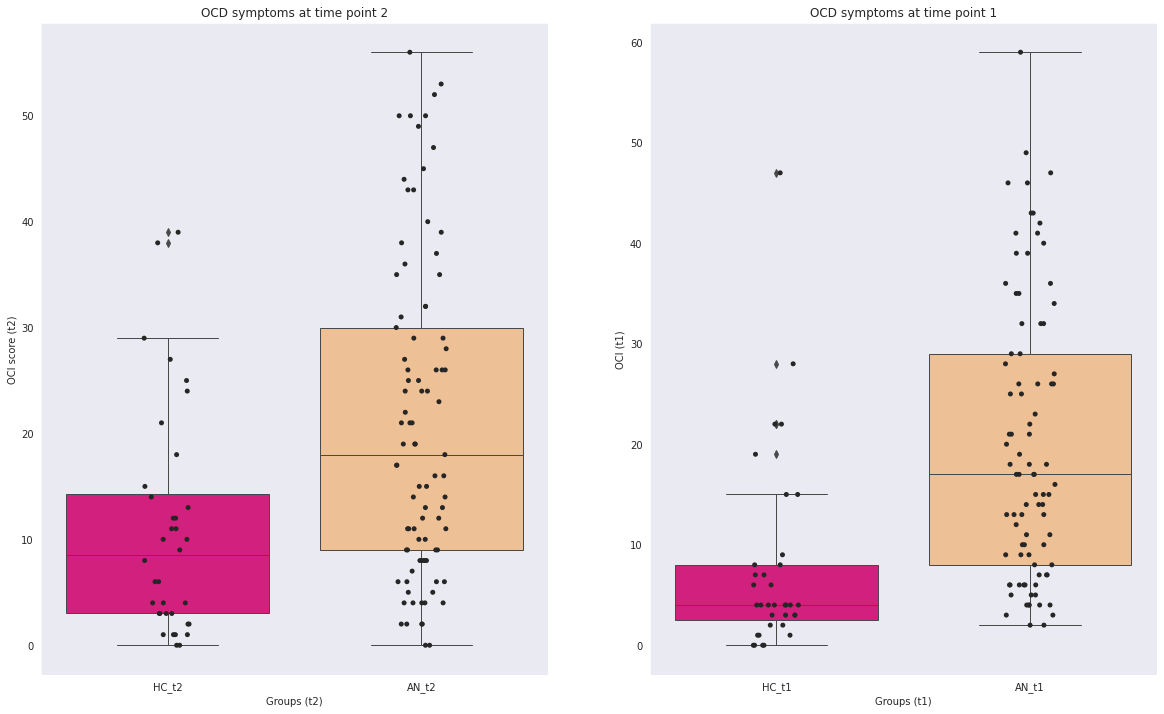

In [12]:
fig,ax = plt.subplots(1,2, figsize=(20,12))
sns.boxplot(x='group', y='overall_score', data=oci_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="overall_score", data=oci_df, ax=ax[0], color=".15")
ax[0].set(xlabel='Groups (t2)', ylabel='OCI score (t2)')
ax[0].set_title('OCD symptoms at time point 2')

sns.boxplot(x='group', y='Initial_OCI_Total_score', data=oci_t1, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="Initial_OCI_Total_score", data=oci_t1, ax=ax[1], color=".15")
ax[1].set(xlabel='Groups (t1)', ylabel='OCI (t1)')
ax[1].set_title('OCD symptoms at time point 1')

Text(0.5, 1.0, 'WSAS at time point 1')

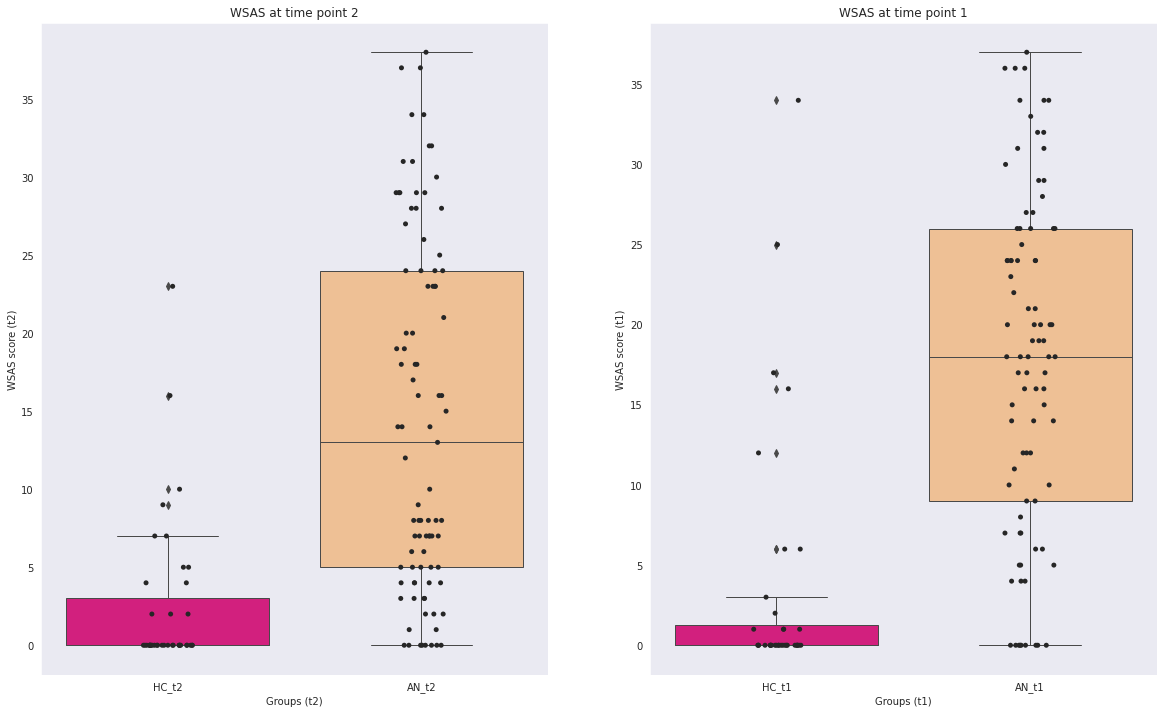

In [13]:
fig,ax = plt.subplots(1,2, figsize=(20,12))
sns.boxplot(x='group', y='overall_score', data=wsas_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="overall_score", data=wsas_df, ax=ax[0], color=".15")
ax[0].set(xlabel='Groups (t2)', ylabel='WSAS score (t2)')
ax[0].set_title('WSAS at time point 2')

sns.boxplot(x='group', y='initial_WSAS', data=wsas_t1, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="initial_WSAS", data=wsas_t1, ax=ax[1], color=".15")
ax[1].set(xlabel='Groups (t1)', ylabel='WSAS score (t1)')
ax[1].set_title('WSAS at time point 1')

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'global score')]

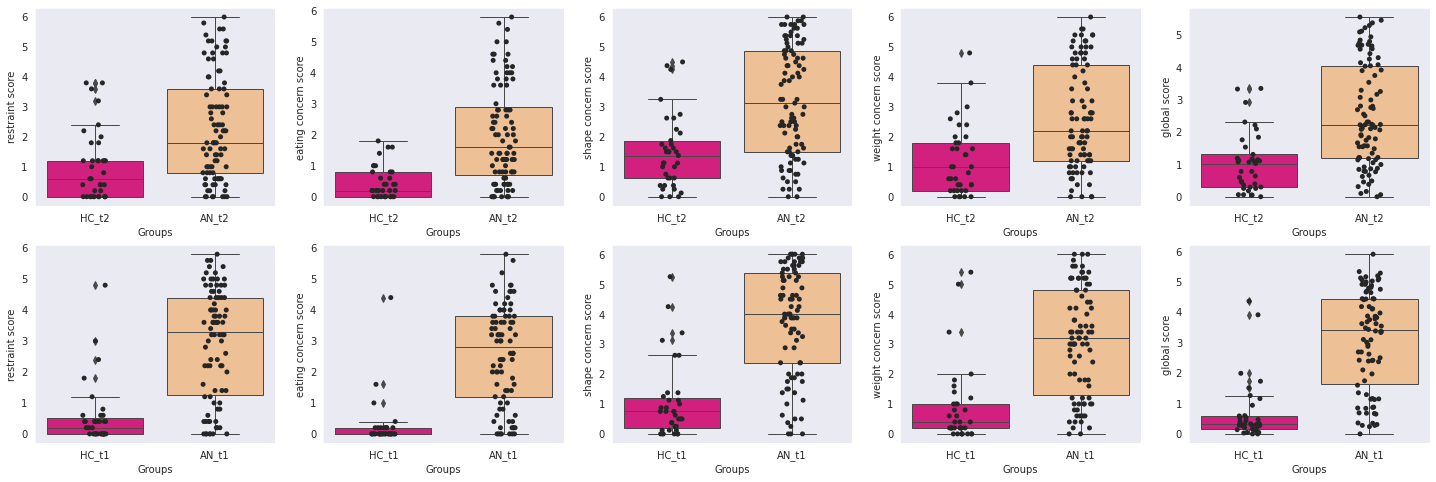

In [14]:
fig,ax = plt.subplots(2,5, figsize=(25,8))

sns.boxplot(x='group', y='restraint_score', data=edeq_df, ax=ax[0][0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][0], x="group", y="restraint_score", data=edeq_df, color=".15")
ax[0][0].set(xlabel='Groups', ylabel='restraint score')

sns.boxplot(x='group', y='eating_concern_score', data=edeq_df, ax=ax[0][1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][1], x="group", y="eating_concern_score", data=edeq_df, color=".15")
ax[0][1].set(xlabel='Groups', ylabel='eating concern score')

sns.boxplot(x='group', y='shape_concern_score', data=edeq_df, ax=ax[0][2], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][2], x="group", y="shape_concern_score", data=edeq_df, color=".15")
ax[0][2].set(xlabel='Groups', ylabel='shape concern score')

sns.boxplot(x='group', y='weight_concern_score', data=edeq_df, ax=ax[0][3], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][3], x="group", y="weight_concern_score", data=edeq_df, color=".15")
ax[0][3].set(xlabel='Groups', ylabel='weight concern score')

sns.boxplot(x='group', y='global_score', data=edeq_df, ax=ax[0][4], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0][4], x="group", y="global_score", data=edeq_df, color=".15")
ax[0][4].set(xlabel='Groups', ylabel='global score')

sns.boxplot(x='group', y='Restraint', data=edeq_t1, ax=ax[1][0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][0], x="group", y="Restraint", data=edeq_t1, color=".15")
ax[1][0].set(xlabel='Groups', ylabel='restraint score')

sns.boxplot(x='group', y='Eating Concern', data=edeq_t1, ax=ax[1][1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][1], x="group", y="Eating Concern", data=edeq_t1, color=".15")
ax[1][1].set(xlabel='Groups', ylabel='eating concern score')

sns.boxplot(x='group', y='Shape Concern', data=edeq_t1, ax=ax[1][2], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][2], x="group", y="Shape Concern", data=edeq_t1, color=".15")
ax[1][2].set(xlabel='Groups', ylabel='shape concern score')

sns.boxplot(x='group', y='Weight Concern', data=edeq_t1, ax=ax[1][3], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][3], x="group", y="Weight Concern", data=edeq_t1, color=".15")
ax[1][3].set(xlabel='Groups', ylabel='weight concern score')

sns.boxplot(x='group', y='Total Score', data=edeq_t1, ax=ax[1][4], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1][4], x="group", y="Total Score", data=edeq_t1, color=".15")
ax[1][4].set(xlabel='Groups', ylabel='global score')

Text(0.5, 1.0, 'ASC symptoms at time point 1')

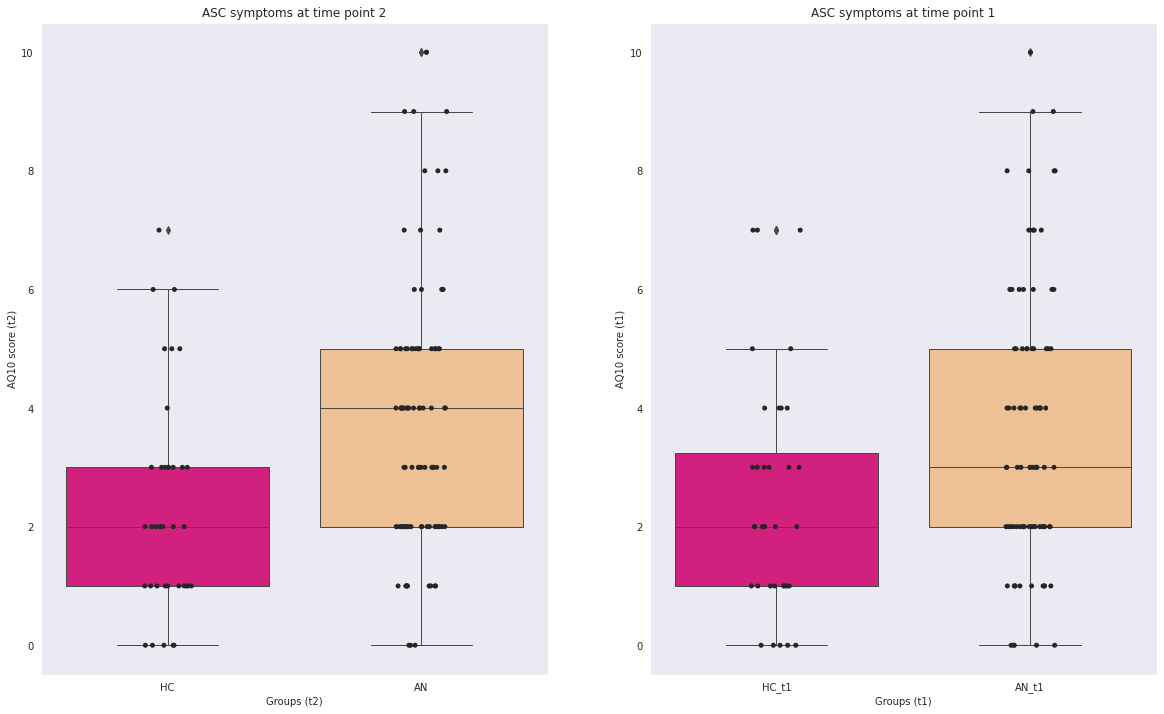

In [15]:
fig,ax = plt.subplots(1,2, figsize=(20,12))
sns.boxplot(x='group', y='overall_score', data=aq_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="overall_score", data=aq_df, ax=ax[0], color=".15")
ax[0].set(xlabel='Groups (t2)', ylabel='AQ10 score (t2)')
ax[0].set_title('ASC symptoms at time point 2')

sns.boxplot(x='group', y='Initial_AQ10', data=aq10_t1, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="Initial_AQ10", data=aq10_t1, ax=ax[1], color=".15")
ax[1].set(xlabel='Groups (t1)', ylabel='AQ10 score (t1)')
ax[1].set_title('ASC symptoms at time point 1')